# On the Resolution and Posterior Covariance Operators in Stress Tensor Inversions

This notebook demonstrates how to use the concepts described in:<br>**The importance of nodal plane orientation diversity for earthquake focal mechanism stress inversions**,<br>authored by Jens-Erik Lundstern, Eric Beaucé and Orlando J. Teran.

## The Forward Problem in Stress Inversions

The Cauchy stress tensor $\sigma$ is symmetric and, thus, has 6 independent components. In stress inversions based on focal mechanisms, only the deviatoric stress tensor $\sigma'$ can be inferred. That is, $\mathrm{Tr}(\sigma') = 0$, which implies that only 5 components of the deviatoric stress tensor are independent. In fact, no information is available on the absolute stresses so the inverse problem can only retrieve the deviatoric stress tensor scaled by an unknown, arbitrary constant: $\sigma^* = \alpha \sigma'$. The 5 independent components of the deviatoric stress tensor are stacked in the model parameter column vector $m\ (5 \times 1)$. We recall that $m$ is defined up to a multiplicative constant.

The non-linear forward problem in stress inversion is:
    $$ G m = \tau(m) \hat{s},\quad (1)$$
where $\hat{s}$ are the unit shear tractions and $\tau(m)$ are their magnitudes. Under the Wallace-Bott assumption, the unit shear tractions are identified to the unit slip vectors given by focal mechanisms. The data only provide $\hat{s}$. See Michael (1984) or Beaucé et al. (2022) for the definition of $G$.

## The Resolution Operator

In a synthetic experiment, given the true (known) model $m_{true}$, we can generate the synthetic data $G m_{true} = \tau(m_{true}) \hat{s}_{true}$. We define the inverse operator $L$ such that:

   $$ \hat{m} = L (\tau(m_{true}) \hat{s}_{true}) \Leftrightarrow \hat{m} = \underbrace{L G}_{R} m_{true}, \quad (2)$$
   $$ R = L G .$$

Equation (1) shows that, in perfect conditions where the data are noise-free and perfectly related to the model parameters via the operator $G$, the inferred model $\hat{m}$ is related to the true model $m_{true}$ via the so-called resolution operator $R$. **If $R$ is different from identity, then the inferred model is different from the true model.**


**Problem:** Focal mechanisms only provide $\hat{s}$ so even for perfect focal mechanisms or field measurements there is no information on $\tau(m)$! Thus, the ideal case described above is *never* encountered in practice.

## Michael's linearization of the problem

Michael (1984) proposed to approximate $\tau(m)$ by a constant term $\tau_0$ based on the fact that faults should be roughly optimally oriented in a given stress field and, thus, be under similar shear tractions. The forward problem becomes:

   $$ G m \approx \tau_0 \hat{s}. \quad (3)$$



The inverse operator $L$ in the linearized problem assumes Equation (3) holds as an equality. The inferred model is therefore:

  $$  \hat{m} = L (\tau_0 \hat{s}) \Leftrightarrow \frac{\hat{m}}{\tau_0} = L \hat{s}. \quad (4)$$

In Equation (4), we see that $L$ applied to $\hat{s}$ returns a scaled version of $\hat{m}$, which does not make any difference with simply obtaining $\hat{m}$ itself since $m$ is defined up to a multiplicative constant.


We can rewrite Equation (4) as:
    $$ \hat{m} = L \frac{\tau_0}{\tau(m_{true})} (\tau(m_{true}) \hat{s} ) \Leftrightarrow \hat{m} = \underbrace{L \frac{\tau_0}{\tau(m_{true})} G}_{R_{linear}} m_{true}. \quad (5)$$

Thus, the resolution operator in the linearized problem is

   $$ R_{linear} = L (\tau_0/\tau(m_{true})) G, \quad (6)$$

which shows that, even if $L$ perfectly inverts $G$ (that is, $LG = I$), $\hat{m}$ will only be a good approximation of $m_{true}$ if $\tau(m_{true})$ is closed to being constant (equal to $\tau_0$), that is, if the assumption of constant shear stress is a good one. We call $R_{constant}$ the resolution operator in the ideal case of constant shear stress, $\tau(m_{true}) = \tau_0$:

   $$ R_{constant} = L G\quad (7). $$



## The iterative solution to the non-linear problem

Beaucé et al. (2022) proposed to solve the non-linear problem (Equation (1)) iteratively by approximating $\tau(m_{true})$ by $\tau(\hat{m})$ with $\hat{m}$ computed at the previous iteration. The resolution matrix of this method is:

   $$ R_{nonlinear} = L (\tau(\hat{m})/\tau(m_{true})) G.\quad (8) $$

Equation (8) shows that the iterative method does not restrict the class of perfectly solvable problems to the problems where $\tau(m_{true}) = \mathrm{constant} = \tau_0$.

## Analyzing the resolution operator in practice


   ### Evaluating the quality of the resolution operator

The difference of the resolution operator $R$ with respect to the identity matrix gives us the quality of $R$. In the problem of stress inversion, we saw that the model parameters can be scaled up to an arbitrary constant without changing the physical conclusions. Thus, $R$ can be compared to a scaled identity $\alpha I$. We decompose the resolution operator into its isotropic (scaled identity, $\alpha I$) and deviatoric ($\delta R$) components:
   $$ R = \alpha I + \delta R;\quad \alpha = \mathrm{Tr}(R)/3.\quad (9) $$
By construction, $\alpha$ is equal to one-third of the trace of $R$. We define the scaled resolution operator $R'$:
   $$ R' = 3R/\mathrm{Tr}(R) = I + 3\delta R/\mathrm{Tr}(R).\quad (10) $$
$R'$ can be compared to identity.


   ### Estimating the resolution operator

The difficulty of the analysis of the resolution operator lies in the presence of $\tau(m_{true})$ in the expression of $R$ (see Equations (6) and (8)). In synthetic experiments where $m_{true}$ is known, then $\tau(m_{true})$ can be computed and used in the evaluation of $R$. In real data applications, we propose a two-step procedure:
   - 1) Study the resolution operator of the constant shear traction problem: $R_{constant} = LG$.
   - 2) Study the resolution operator $R'_{linear}$ or $R'_{nonlinear}$ approximating $\tau(m_{true})$ by $\tau(\hat{m})$ (using the definition of $R'$ given by Equation (10)). Note that, using this approximation, $R_{nonlinear}$ is simply $R_{constant}$.

$R_{constant}$ gives insights into the limitations of the inverse solution due to the ill-posedness of the problem, such as, for example, a lack of diversity of focal mechanisms resulting in an under-determined problem. $R_{linear}$ estimates the limitations due to assuming that all shear tractions have the same magnitude. Since the iterative method does not such an assumption, we have $R_{nonlinear} = R_{linear}$.


## What is the inverse operator $L$?

The inverse operator $L$ (Equation (2)) is defined by the inversion method used to solve the problem. A popular inverse is the solution to the least-squares problem. Tarantola and Valette (1982) proposed a general least-squares solution:
$$ L = \left( G^T C_D^{-1} G + C_M^{-1} \right)^{-1} G^T C_D^{-1}.\quad (11) $$
$C_D$ and $C_M$ represents the prior information we have on data and model parameters assuming that these are realizations of normal distributions characterized by the covariance matrices $C_D$ and $C_M$. When no prior information is available, $C_M = \inf \Rightarrow C_M^{-1} = 0$ and $C_D = C_D^{-1} = I$. The Tarantola and Valette simplifies to the so-called normal equation:
$$ L = (G^T G)^{-1} G^T.\quad (12) $$

Experimenting with the right prior information in Equation (11) brings plenty of interesting ways of better constraining the inverted stress tensor but, because the purpose of the present notebook is to demonstrate the use of the resolution operator, we will here use the normal equation (12).

## Posterior covariance operator

In the Tarantola and Valette formalism, the posterior covariance operator describes the gaussian distribution of the inverted stress tensor, it is given by:
$$ \hat{C}_M = \left( G^T C_D^{-1} G + C_M^{-1} \right)^{-1}\quad  (13)$$
The squre-root of the diagonal terms of $\hat{C}_M$ are the standard errors (1-$\sigma$) of the inverted parameters. The off-diagonal terms tell us about correlations between inverted parameters. If an off-diagonal term is significantly different from 0, it means that some parameters could not be resolved independently. The off-diagonal terms are more easily interpreted when looking at the normalized posterior covariance operator $\rho_M$:
$$ \rho_{M,ij} = \dfrac{\hat{C}_{M,ij}}{\sqrt{\hat{C}_{M,ii} \hat{C}_{M,jj}}}.\quad (14) $$
Note: In Equation (14), the Einstein summation convention is NOT followed. Diagonal terms of $\rho_{M,ij}$ are equal to 1 and off-diagonal terms are $\pm 1$. 

## Relationship between the resolution operator and the posterior covariance operator

One can demonstrate that:

$$ R = I - \hat{C}_M C_M^{-1},\quad (15)$$
meaning that the concept of resolution operator is only relevant when one assumes some amount of prior knowledge about the model parameters. Otherwise, $C_M^{-1} = 0$ and $R = I$.

**More information in Tarantola's book, Inverse problem theory and methods for model parameter estimation (2005)!**

## References

- Beaucé, Eric, Robert D. Van Der Hilst, and Michel Campillo. "An iterative linear method with variable shear stress magnitudes for estimating the stress tensor from earthquake focal mechanism data: method and examples." Bulletin of the Seismological Society of America 112.3 (2022): 1224-1239.

- Michael, Andrew J. "Determination of stress from slip data: faults and folds." Journal of Geophysical Research: Solid Earth 89.B13 (1984): 11517-11526.

- Tarantola, Albert, and Bernard Valette. "Inverse problems= quest for information." Journal of geophysics 50.1 (1982): 159-170.

- Tarantola, Albert. Inverse problem theory and methods for model parameter estimation. Society for industrial and applied mathematics, 2005.


## Import librairies and define parameters

In [1]:
import os
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import mplstereonet
import utils

%config InlineBackend.figure_formats = ["svg"]
plt.rcParams["svg.fonttype"] = "none"

In [2]:
# define path and filename variables
PATH_DATA = os.path.join(os.pardir, "data")
DATA_FILENAME = "dataset_group1.csv"
STRESS_TENSOR_FILENAME = "stress_tensors_NWU.h5"

## Load the data

Note: The data provided here are the same as what we used in our paper to build Figs 10-13.

In [3]:
data = pd.read_csv(
    os.path.join(PATH_DATA, DATA_FILENAME),
    index_col=0
)
# print data
data

,Unnamed: 0,xloc_synth,yloc_synth,str1_synth_1,str1_synth_2,str1_synth_3,str1_synth_4,dip1_synth_1,dip1_synth_2,dip1_synth_3,...,SHmax_or,Aphi,orig_ID,xloc_orig,yloc_orig,str1_orig,dip1_orig,rake1_orig,group_id,fm_type_index
0,6,-102.113654,32.088631,100.947376,98.265422,102.688373,95.229247,80,83.932888,78.800139,...,82.351990,0.954756,1,-102.117985,32.111018,100.947376,80,-28.497041,1,1
1,52,-102.304795,31.978265,104.356178,96.125038,103.485637,262.887333,80,85.736845,81.183583,...,85.244408,0.928336,2,-102.303926,31.974869,104.356178,80,-28.768911,1,1
2,270,-102.333480,31.976490,102.903284,105.281896,87.784370,105.635343,80,80.354319,75.432495,...,84.770988,0.924669,8,-102.332882,31.973880,102.903284,80,-30.314818,1,1
3,45,-102.302582,31.969619,104.356178,113.731895,97.560857,104.838704,80,76.259869,77.133053,...,85.370720,0.927900,2,-102.303926,31.974869,104.356178,80,-28.768911,1,1
4,296,-102.190384,32.111764,96.882993,98.134857,260.206769,85.130077,80,80.291565,88.046205,...,82.669815,0.949655,9,-102.191224,32.118728,96.882993,80,-36.082507,1,1
5,189,-102.179378,32.241842,74.280852,74.178271,73.906814,67.399191,80,79.872972,81.922433,...,80.735260,0.956599,6,-102.166841,32.286388,74.280852,80,-120.696034,1,0
6,191,-102.172505,32.266263,74.280852,78.003710,74.344771,272.416040,80,82.817590,80.454454,...,80.519997,0.957914,6,-102.166841,32.286388,74.280852,80,-120.696034,1,0
7,116,-102.259129,32.074442,100.926691,101.004200,274.400935,103.535384,80,78.159896,75.691890,...,83.986717,0.940523,4,-102.256904,32.062918,100.926691,80,-32.129669,1,1
8,90,-102.322171,31.931204,289.584838,290.319502,287.802021,301.793865,80,83.722380,61.269649,...,85.702797,0.922286,3,-102.321851,31.930303,289.584838,80,-23.549824,1,1
9,250,-102.331809,31.969197,102.903284,113.146126,91.467079,102.421537,80,83.589379,87.826207,...,84.905243,0.924286,8,-102.332882,31.973880,102.903284,80,-30.314818,1,1


The data set contains 35 focal mechanisms with 4 different levels of noise. Here, we only focus on the noise-free data.

In [4]:
strikes_true, dips_true, rakes_true = (
    data["str1_synth_1"].values,
    data["dip1_synth_1"].values,
    data["rake1_synth_1"].values,
)


In [5]:
# define the covariance matrices (mostly here so that you can easily modify this notebook to experiment with prior information)
# the data covariance matrix C_D is a (3 x num_planes, 3 x num_planes) matrix and the model covariance matrix C_M is a (5 x 5) matrix
num_planes = len(strikes_true)
C_D_inv = np.identity(3*num_planes, dtype=np.float32)
C_M_inv = 0.01*np.identity(5, dtype=np.float32)

## Build the inverse operator $L$

First, compute the normal fault and slip vectors using `strikes_true`, `dips_true` and `rakes_true`.

In [6]:
n_true, s_true = utils.normal_slip_vectors(
    strikes_true, dips_true, rakes_true
)
n_true, s_true = n_true.T, s_true.T

print(f"The shapes of n_true and s_true are: {n_true.shape} and {s_true.shape}, that is, (num_planes, 3)")

The shapes of n_true and s_true are: (35, 3) and (35, 3), that is, (num_planes, 3)


Build the forward modelling matrix $G$ (Equation (1)).

In [7]:
G = utils.forward_model(n_true)

print(f"The shape of G is: {G.shape}, that is, (3 x num_planes, 5=num_stress_tensor_elements)")

The shape of G is: (105, 5), that is, (3 x num_planes, 5=num_stress_tensor_elements)


Now, we can use Equation (11) (which is equivalent to Equation (12) is you use the default values for C_D_inv and C_M_inv).

In [8]:
C_M_post = np.linalg.inv((G.T) @ C_D_inv @ G + C_M_inv)
C_M_post_normalized = ( C_M_post / np.sqrt(np.sqrt(np.diag(C_M_post))[:, None]) ) / (np.sqrt(np.diag(C_M_post))[None, :])
L = np.linalg.inv((G.T) @ C_D_inv @ G + C_M_inv) @ ((G.T) @ C_D_inv)

print(f"The shape of C_M_post is: {C_M_post.shape}")
print(f"The shape of L is: {L.shape}")

The shape of C_M_post is: (5, 5)
The shape of L is: (5, 105)


We have all the elements required to build the resolution operator $R = LG$.

In [9]:
R = L@G

## Plot

The 5-element $m$ vector is $(\sigma_{11}, \sigma_{12}, \sigma_{13}, \sigma_{22}, \sigma_{23})$. We work in the (N=north, W=west, U=up) coordinate system, therefore $m$ is:<br>
$(\sigma_{NN}, \sigma_{NW}, \sigma_{NU}, \sigma_{WW}, \sigma_{WU})$

In [10]:
def plot_resolution_covariance_corrcoef(
    R,
    C_m_post,
    C_m_post_normalized,
    figname="resolution_covariance",
    figtitle=r"Resolution operator $R = LG$, posterior covariance $\hat{C}_M$"
             r" and normalized posterior covariance $\rho_M$",
    figsize=(13, 10),
    cmap="viridis"
):
    """ """
    fig, axes = plt.subplots(num=figname, ncols=2, nrows=2, figsize=figsize)

    fig.suptitle(figtitle)
    plt.subplots_adjust(top=0.90, bottom=0.08, hspace=0.30)

    axes[0, 0].set_title(r"Resolution operator, $R = LG$")
    pc0 = axes[0, 0].pcolormesh(R, cmap=cmap, rasterized=True,)
    plt.colorbar(pc0, label="Resolution operator")

    diff = np.abs(np.identity(5) - R)
    axes[0, 1].set_title(r"$\vert I - R \vert$")
    pc1 = axes[0, 1].pcolormesh(diff, cmap=cmap, rasterized=True, vmin=0.,)
    plt.colorbar(pc1, label="Deviation from identity")

    axes[1, 0].set_title(r"Posterior covariance operator, $\hat{C}_M$")
    pc2 = axes[1, 0].pcolormesh(C_m_post, cmap=cmap, rasterized=True)
    plt.colorbar(pc2, label="Covariance")

    #vmax = 1.
    vmin = min(C_m_post_normalized.min(), C_m_post_normalized.min())-0.01
    vmax = -vmin
    cm = plt.cm.get_cmap("coolwarm")
    cm.set_over("w")

    axes[1, 1].set_title(r"Normalized post. covariance op., $\rho_M$")
    pc3 = axes[1, 1].pcolormesh(
            C_m_post_normalized, rasterized=True, vmin=vmin, vmax=vmax, cmap=cm
            )
    plt.colorbar(pc3, label="Normalized covariance")

    tickpos = [0.5, 1.5, 2.5, 3.5, 4.5]
    ticklabels = [
            r"$\sigma_{11}$",
            r"$\sigma_{12}$",
            r"$\sigma_{13}$",
            r"$\sigma_{22}$",
            r"$\sigma_{23}$"
            ]
    for i, ax in enumerate(axes.flatten()):
        ax.set_xlabel("True model parameter")
        ax.set_ylabel("Inverted model parameter")
        ax.set_xticks(tickpos)
        ax.set_xticklabels(ticklabels)
        ax.set_yticks(tickpos)
        ax.set_yticklabels(ticklabels)
        ax.text(
            -0.1,
            1.05,
            f"({string.ascii_lowercase[i]})",
            transform=ax.transAxes,
            size=20,
        )
    return fig


/tmp/ipykernel_51331/2402465726.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("coolwarm")


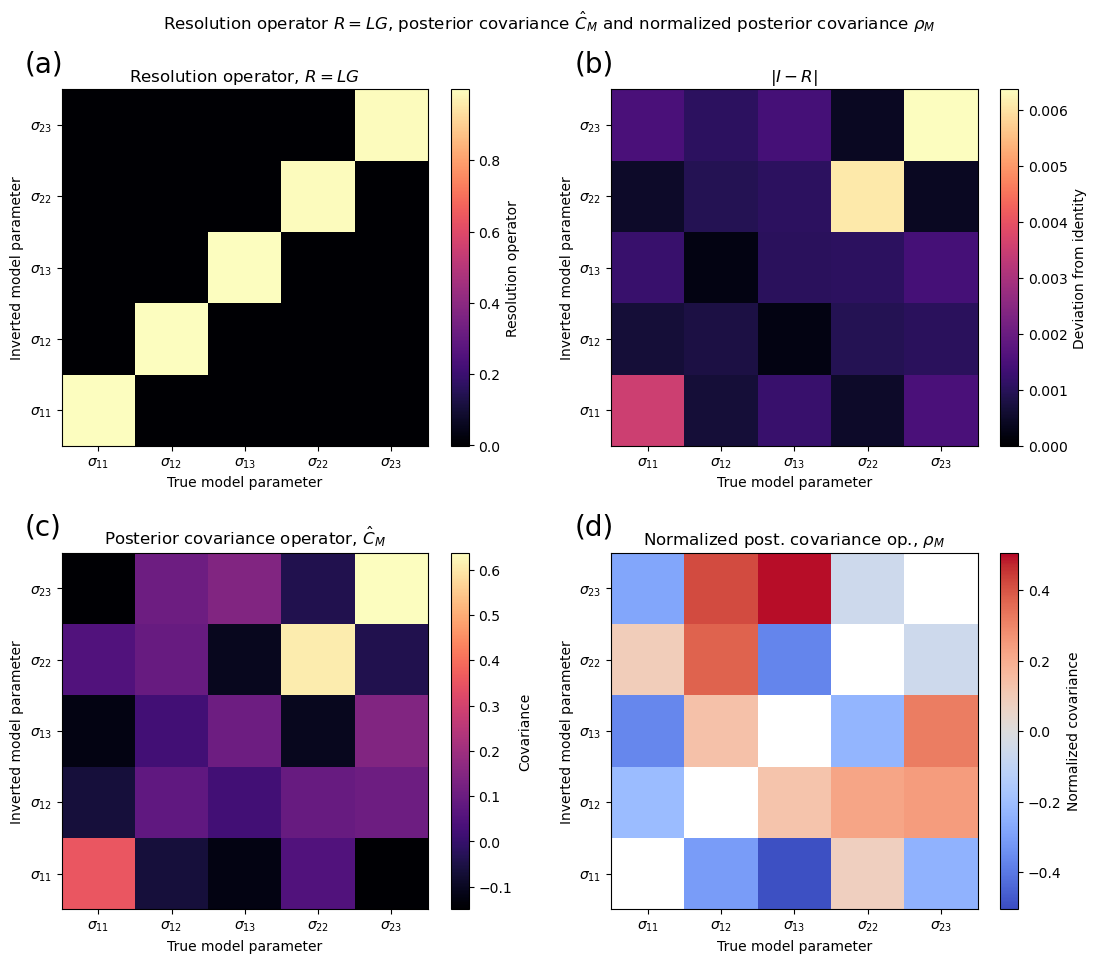

In [11]:
fig = plot_resolution_covariance_corrcoef(
    R, C_M_post, C_M_post_normalized, cmap="magma"
)

## Eigendecomposition of the resolution operator

The eigendecomposition of the resolution operator is:
$$ R = V \Sigma V^{-1},\quad (16)$$
where the 5 columns of $V$ are the 5 eigenvectors $v_i$ of $R$ and the 5 diagonal elements of $\Sigma$ are the 5 eigenvalues $\lambda_i$ of $R$.

We recall that $R$ acts on 5-element vectors that live in the model space (Equation (2)). Each vector $m$ of the model space can be decomposed onto the eigenbasis of $R$, that is:
$$ m = \sum_{i=1}^{i=5} \alpha_{i} v_{i},\quad (17) $$
where the $\alpha_i$ are scalar coefficients. Likewise, the true stress tensor $m_{true}$ is:
$$ m_{true} = \sum_{i=1}^{i=5} \alpha_{true,i} v_{i},\quad (18) $$
and the inverted stress tensor $\hat{m}$ is:
$$ \hat{m} = R \sum_{i=1}^{i=5} \alpha_{true,i} v_{i} = \sum_{i=1}^{i=5} \alpha_{true,i} R v_{i}.\quad (19) $$
By definition of the eigenvector $v_i$, $R v_i = \lambda_i v_i$, therefore Equation (19) can be rewritten as:
$$ \hat{m} = \sum_{i=1}^{i=5} \alpha_{true,i} \lambda_i v_{i}.\quad (20)$$

**The interpretation of Equation (20) is essential to understand which features of the stress tensor can be resolved.** If one or more eigenvalues of $R$ are equal to 0 or very small, $\lambda_{j \in \mathcal{K}} = 0$, then the corresponding eigenvectors $v_{j \in \mathcal{K}}$ span the so-called "kernel" or "null space" of $R$. **The components of $m_{true}$ that lie in $\mathrm{Span}\lbrace v_{j \in \mathcal{K}} \rbrace$ cannot be resolved even if there are no errors in the data**.
$$ \hat{m} = \sum_{i \notin \mathcal{K}} \alpha_{true,i} \lambda_i v_{i} + \underbrace{\sum_{i \in \mathcal{K}} \alpha_{true,i} 0 v_{i}}_{= 0}.\quad (21)$$

**Even if an eigenvalue is not strictly 0, the reasoning above tells us that the eigenvectors associated with smallest eigenvalues describe the least resolved features of the stress tensor.**

In [12]:
# eigendecompositon of R, eigenvalues are in S and eigenvectors in V
S, V = np.linalg.eig(R)
# V[:, i] is the i-th eigenvector of R

# order eigenvalues from largest to smallest
order_indexes = np.argsort(S)[::-1]

S = S[order_indexes]
V = V[:, order_indexes]

In [13]:
def plot_resolution_eigendecomposition(S, V):
    fig = plt.figure("eigenvalues_resolution", figsize=(13, 5))
    gs = fig.add_gridspec(nrows=1, ncols=10)

    ax1 = fig.add_subplot(gs[:5])

    ax1.plot(S, marker="o", ls="", color="C0")    

    ax1.set_title(r"Eigenvalues of the resolution operator $R=LG$")
    ax1.set_ylabel("Eigenvalues")
    ax1.set_xlabel("Eigenvalue index")

    ax1.set_xticks([0, 1, 2, 3, 4])
    ax1.grid()

    yticklabels = [r"$\sigma_{11}$", r"$\sigma_{12}$", r"$\sigma_{13}$", r"$\sigma_{22}$", r"$\sigma_{23}$"]

    for i in range(5):
        ax_i = fig.add_subplot(gs[5+i])
        pc = ax_i.pcolormesh(V[:, i][:, None], cmap="coolwarm", rasterized=True, vmin=-1., vmax=+1.)


        if i == 2:
            title_cst = r"Eigenvectors of $R$""\n"r"$\lambda=$"f"{S[i]:.2e}"
        else:
            title_cst = r"$\lambda=$"f"{S[i]:.2f}"

        ax_i.set_title(title_cst, fontsize=12)

        for ax in [ax_i]:
            ax.set_xticks([0.5])
            ax.set_xticklabels([i])
            ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5])
            ax.set_yticklabels(yticklabels)

    cax = fig.add_axes([0.93, 0.25, 0.02, 0.50])
    plt.colorbar(pc, cax=cax, label=r"Stress tensor element $\sigma_{ij}$")

    plt.subplots_adjust(wspace=1.3, hspace=0.3)
    return fig

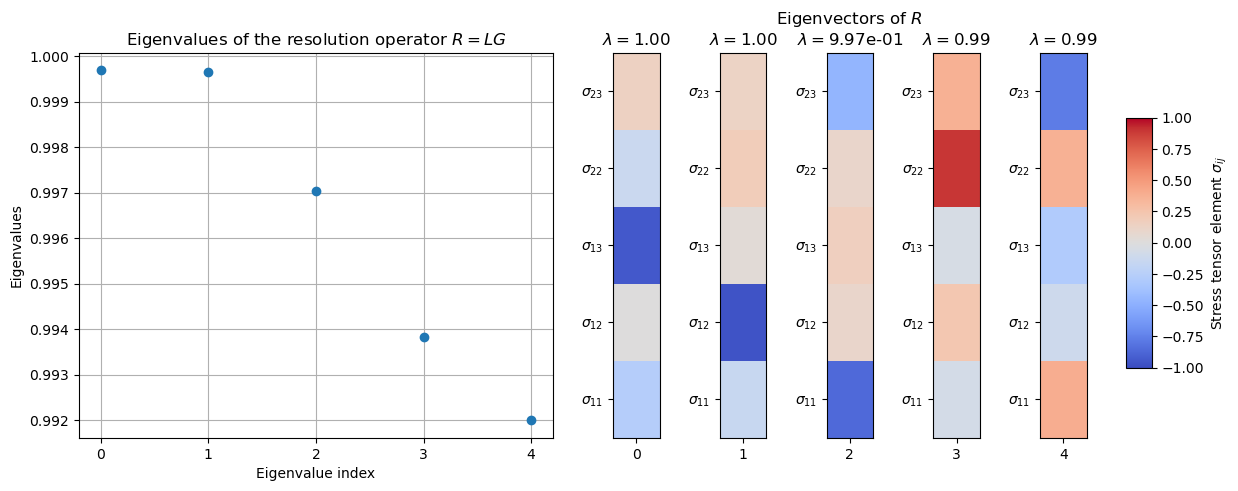

In [14]:
fig = plot_resolution_eigendecomposition(S, V)

## Eigendecomposition of the posterior covariance operator

Because the posterior covariance operator $\hat{C}_M$ and the resolution operator $R$ are related through Equation (15):
$$ R = I - \hat{C}_M C_M^{-1},\quad (15)$$
their eigenbases are also related. In fact, if $C_M \propto I$, their eigenbases are similar. However, now, the **largest** eigenvalues of $\hat{C}_M$ are associated with the least resolved features of the stress tensor.

In [15]:
# eigendecompositon of R, eigenvalues are in S and eigenvectors in V
S_cov, V_cov = np.linalg.eig(C_M_post)
# V[:, i] is the i-th eigenvector of R

# order eigenvalues from smallest to largest ()
order_indexes_cov = np.argsort(S_cov)

S_cov = S_cov[order_indexes]
V_cov = V_cov[:, order_indexes]

In [16]:
def plot_covariance_eigendecomposition(S, V):
    fig = plt.figure("eigenvalues_covariance", figsize=(13, 5))
    gs = fig.add_gridspec(nrows=1, ncols=10)

    ax1 = fig.add_subplot(gs[:5])

    ax1.plot(S, marker="s", ls="", color="C1")    

    ax1.set_title(r"Eigenvalues of the posterior covariance operator $\hat{C}_M$")
    ax1.set_ylabel("Eigenvalues")
    ax1.set_xlabel("Eigenvalue index")

    ax1.set_xticks([0, 1, 2, 3, 4])
    ax1.grid()

    yticklabels = [r"$\sigma_{11}$", r"$\sigma_{12}$", r"$\sigma_{13}$", r"$\sigma_{22}$", r"$\sigma_{23}$"]

    for i in range(5):
        ax_i = fig.add_subplot(gs[5+i])
        pc = ax_i.pcolormesh(V[:, i][:, None], cmap="coolwarm", rasterized=True, vmin=-1., vmax=+1.)


        if i == 2:
            title_cst = r"Eigenvectors of $\hat{C}_M$""\n"r"$\lambda=$"f"{S[i]:.2f}"
        else:
            title_cst = r"$\lambda=$"f"{S[i]:.2f}"

        ax_i.set_title(title_cst, fontsize=12)

        for ax in [ax_i]:
            ax.set_xticks([0.5])
            ax.set_xticklabels([i])
            ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5])
            ax.set_yticklabels(yticklabels)

    cax = fig.add_axes([0.93, 0.25, 0.02, 0.50])
    plt.colorbar(pc, cax=cax, label=r"Stress tensor element $\sigma_{ij}$")

    plt.subplots_adjust(wspace=1.3, hspace=0.3)
    return fig

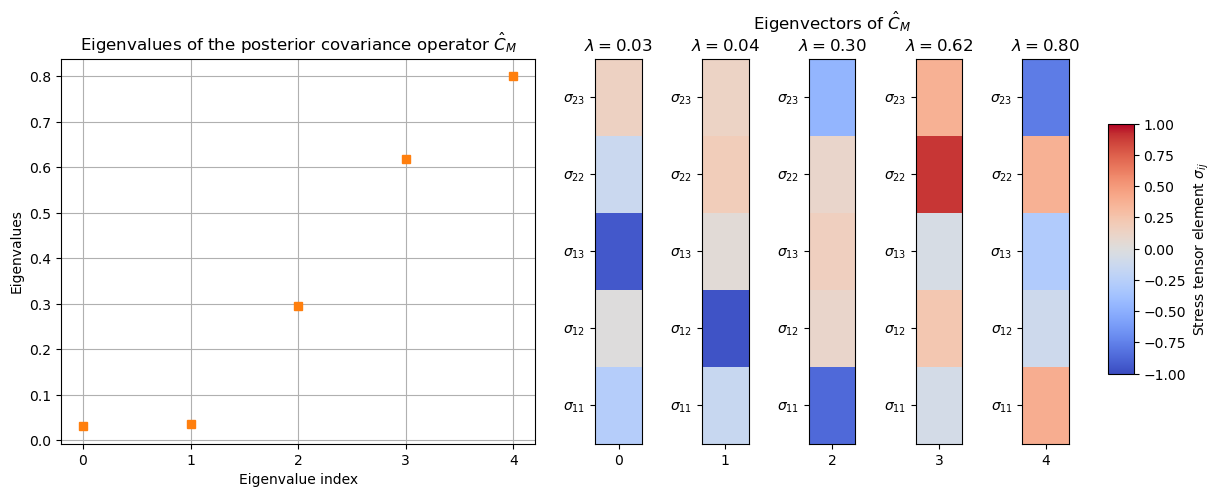

In [17]:
fig = plot_covariance_eigendecomposition(S_cov, V_cov)

Notice the similarity between the eigenvectors of $R$ and $\hat{C}_M$ that represent the least resolved features of the stress tensor.

## Explore the least resolved features of the stress tensor

The fact that some stress tensor features are less well resolved than others results from the geometry of the problem. The forward problem (Equations (1,2)) tells us that only resolved shear stress contributes to constraining the inverted stress tensor. In this example, faut planes all strike east-west and are all almost vertical so $\sigma_{22}=\sigma_{WW}$, $\sigma_{23}=\sigma_{WU}$ and $\sigma_{11} = \sigma_{NN}$ have little effect on the resolved shear stresses. Consequently, these components have little weight in the inverse problem and thereby are not well resolved.

In [18]:
# read stress tensor at each lineament
stress_tensors = {}
with h5.File(os.path.join(PATH_DATA, STRESS_TENSOR_FILENAME), mode="r") as fin:
    for key in fin:
        stress_tensors[int(key)] = fin[key]["stress_tensor_NWU"][()]
# take the "true" stress tensor as the average of the in-situ measured stress tensors
true_stress_tensor = np.mean(np.stack([stress_tensors[key] for key in stress_tensors], axis=0), axis=0)
# make it deviatoric
true_stress_tensor -= np.mean(np.diag(true_stress_tensor))*np.identity(3)

Build the 5-element true stress tensor vector $m_{true}$.

In [19]:
m_true = np.array(
    [
        true_stress_tensor[0, 0],
        true_stress_tensor[0, 1],
        true_stress_tensor[0, 2],
        true_stress_tensor[1, 1],
        true_stress_tensor[1, 2],
    ]
)

In [20]:
def shear_cst_var(G, m):
    """
    Compute the constant magnitude and variable magnitude shear tractions given the
    (3*num_planes, 5) forward modelling matrix and (5, 1) stress tensor vector. The
    constant magnitude shear tractions are unit vectors and the variable magnitude
    shear tractions are normalized by their average magnitude.

    Parameters
    ----------
    G : numpy.ndarray of shape (3*num_planes, 5)
        The 3*num_planes, 5 forward modelling matrix.
    m : numpy.ndarray of shape (5,)
        A 5x1 vector representing the stress tensor.

    Returns
    -------
    cst_shear : numpy.ndarray of shape (num_planes, 3)
        num_planes 3-element shear traction vector with constant magnitude.
    var_shear : numpy.ndarray of shape (num_planes, 3)
        num_planes 3-element shear traction vector with variable magnitude.
    """
    shear = (G @ (m.reshape(-1, 1))).reshape(-1, 3)
    shear_mag = np.sqrt(np.sum(shear**2, axis=1))
    cst_shear = shear / shear_mag[:, None]
    var_shear = shear / np.mean(shear_mag)
    return cst_shear, var_shear


def inplane_shear_vectors(n, shear_cst, shear_var):
    """
    Compute the 2D in-plane coordinates of the shear vectors. The 2D
    in-plane representation of the shear tractions give the rake and 
    shear magnitude in the fault planes described by the fault normals `n`.

    Parameters
    ----------
    n : np.ndarray
        A (n, 3) numpy array representing the outward pointing normal of
        the foot wall.
    shear_cst : np.ndarray
        A (n, 3) numpy array representing the set of constant magnitude shear
        tractions returned by `shear_cst_var`.
    shear_var : np.ndarray
        A (n, 3) numpy array representing the set of variable magnitude shear
        tractions returned by `shear_cst_var`.

    Returns
    -------
    inplane_shear_cst : np.ndarray
        A (n, 2) numpy array representing the set of 2D in-plane coordinates
        of the constant magnitude shear tractions.
    inplane_shear_var : np.ndarray
        A (n, 2) numpy array representing the set of 2D in-plane coordinates
        of the variable magnitude shear tractions.
    """
    unit_shear_cst = shear_cst / np.sqrt(np.sum(shear_cst**2, axis=1, keepdims=True))
    unit_shear_var = shear_var / np.sqrt(np.sum(shear_var**2, axis=1, keepdims=True))
    output = map(utils.strike_dip_rake, n, unit_shear_cst)
    _, _, rakes_cst = np.asarray(list(output)).T

    output = map(utils.strike_dip_rake, n, unit_shear_var)
    _, _, rakes_var = np.asarray(list(output)).T
    inplane_shear_cst = np.stack(
        [np.cos(np.deg2rad(rakes_cst)), np.sin(np.deg2rad(rakes_cst))], axis=1
    ) * np.sqrt(np.sum(shear_cst**2, axis=1, keepdims=True))
    inplane_shear_var = np.stack(
        [np.cos(np.deg2rad(rakes_var)), np.sin(np.deg2rad(rakes_var))], axis=1
    ) * np.sqrt(np.sum(shear_var**2, axis=1, keepdims=True))
    return inplane_shear_cst, inplane_shear_var


In [21]:
# n_true should have already been computed, by here is it,
n_true, s_true = utils.normal_slip_vectors(
    strikes_true, dips_true, rakes_true
)
n_true, s_true = n_true.T, s_true.T

In [22]:
print(L.shape, s_true.shape)
print(L@s_true.reshape(-1, 1))

(5, 105) (35, 3)
[[ 1.93172816]
 [ 0.33639321]
 [ 0.0720161 ]
 [-0.7537724 ]
 [ 0.09489747]]


In [23]:
# compute the 2D in-plane coordinates of each shear traction
# resolved on the fault planes described by n_true
# one set of shear tractions is normalized in order to visualize
# the effect of assuing constant shear magnitude
inplane_shear_cst, inplane_shear_var = inplane_shear_vectors(
    n_true, *shear_cst_var(G, m_true)
)

In [24]:
def plot_stress_tensor(stress_tensor, ax, markers = ["o", "s", "v"]):
    """
    """
    principal_stresses, principal_directions = utils.stress_tensor_eigendecomposition(
        stress_tensor
    )
    R = utils.R_(principal_stresses)
    A_phi = utils.A_phi_(
        principal_stresses, principal_directions
    )
    for k in range(3):
        az, pl = utils.get_bearing_plunge(
            principal_directions[:, k]
        )
        ax.line(
            pl,
            az,
            marker=markers[k],
            markeredgecolor="k",
            markeredgewidth=2,
            markerfacecolor="none",
            markersize=15,
            zorder=2,
            label=rf"$\sigma_{{{k+1}}}$"
        )
    text =  f" R={R:.2f},\n" r"$A_{\phi}=$"f"{A_phi:.2f}"
    ax.text(0.2, 1.03, text, transform=ax.transAxes, va="bottom", ha="right", bbox={"facecolor": "white"})
    ax._polar.set_position(ax.get_position())
    ax.grid()

def plot_perturbed_stress_tensor(
        m_true, eigenvector, perturbations=[0., 0.25, 0.50, 1.0], eigenvector_idx=0, figtitle="", figsize=(14, 18)
        ):
    fig = plt.figure("perturbed_stress_tensor", figsize=figsize)
    plt.subplots_adjust(top=0.96, bottom=0.03, hspace=0.02)
    fig.suptitle(figtitle, fontsize=15)

    

    nrows = len(perturbations)
    gs = fig.add_gridspec(nrows=nrows, ncols=5)

    inplane_shear_true_cst, inplane_shear_true_var = inplane_shear_vectors(
        n_true, *shear_cst_var(G, m_true)
    )

    for j in range(nrows):
        m_perturbation = perturbations[j]*eigenvector
        m = m_true + m_perturbation
        full_stress_tensor = np.array(
            [
                [m[0], m[1], m[2]],
                [m[1], m[3], m[4]],
                [m[2], m[4], -m[0] - m[3]],
            ]
        )
        # normalize the stress tensor 
        norm = np.sqrt(np.sum(full_stress_tensor**2))
        m /= norm
        inplane_shear_cst, inplane_shear_var = inplane_shear_vectors(
            n_true, *shear_cst_var(G, m)
        )
        rms_diff_cst = np.sqrt(np.mean((inplane_shear_true_cst - inplane_shear_cst)**2))
        rms_diff_var = np.sqrt(np.mean((inplane_shear_true_var - inplane_shear_var)**2))
        ax1 = fig.add_subplot(gs[j, 0], projection="stereonet")
        ax1.set_title(
            fr"$m = m_{{true}} + {perturbations[j]} v_{{i={eigenvector_idx}}}$", pad=35
            )
        plot_stress_tensor(full_stress_tensor, ax1)
        ax2 = fig.add_subplot(gs[j, 1:3])
        ax3 = fig.add_subplot(gs[j, 3:])
        for i in range(inplane_shear_cst.shape[0]):
            ax2.arrow(0., 0., inplane_shear_cst[i, 0], inplane_shear_cst[i, 1], width=0.03)
            ax3.arrow(0., 0., inplane_shear_var[i, 0], inplane_shear_var[i, 1], width=0.03)
        if j == 0:
            ax2.set_title("Constant magnitude shear tractions")
            ax3.set_title("Variable magnitude shear tractions")
        for ax in [ax2, ax3]:
            ax.set_aspect("equal")
            ax.axis("off")
        ax2.text(0.35, 0.0, r"$\Delta \tau=$" f"{rms_diff_cst:.2f}", va="top", ha="left", fontsize=15, transform=ax2.transAxes)
        ax3.text(0.35, 0.0, r"$\Delta \tau=$" f"{rms_diff_var:.2f}", va="top", ha="left", fontsize=15, transform=ax3.transAxes)
    plt.text(
        0.95, 0., r"$\Delta \tau$: Root-mean-square difference between the perturbed shear tractions and the reference shear tractions",
        ha="right", va="bottom", fontsize=15, transform=fig.transFigure
        )
    return fig


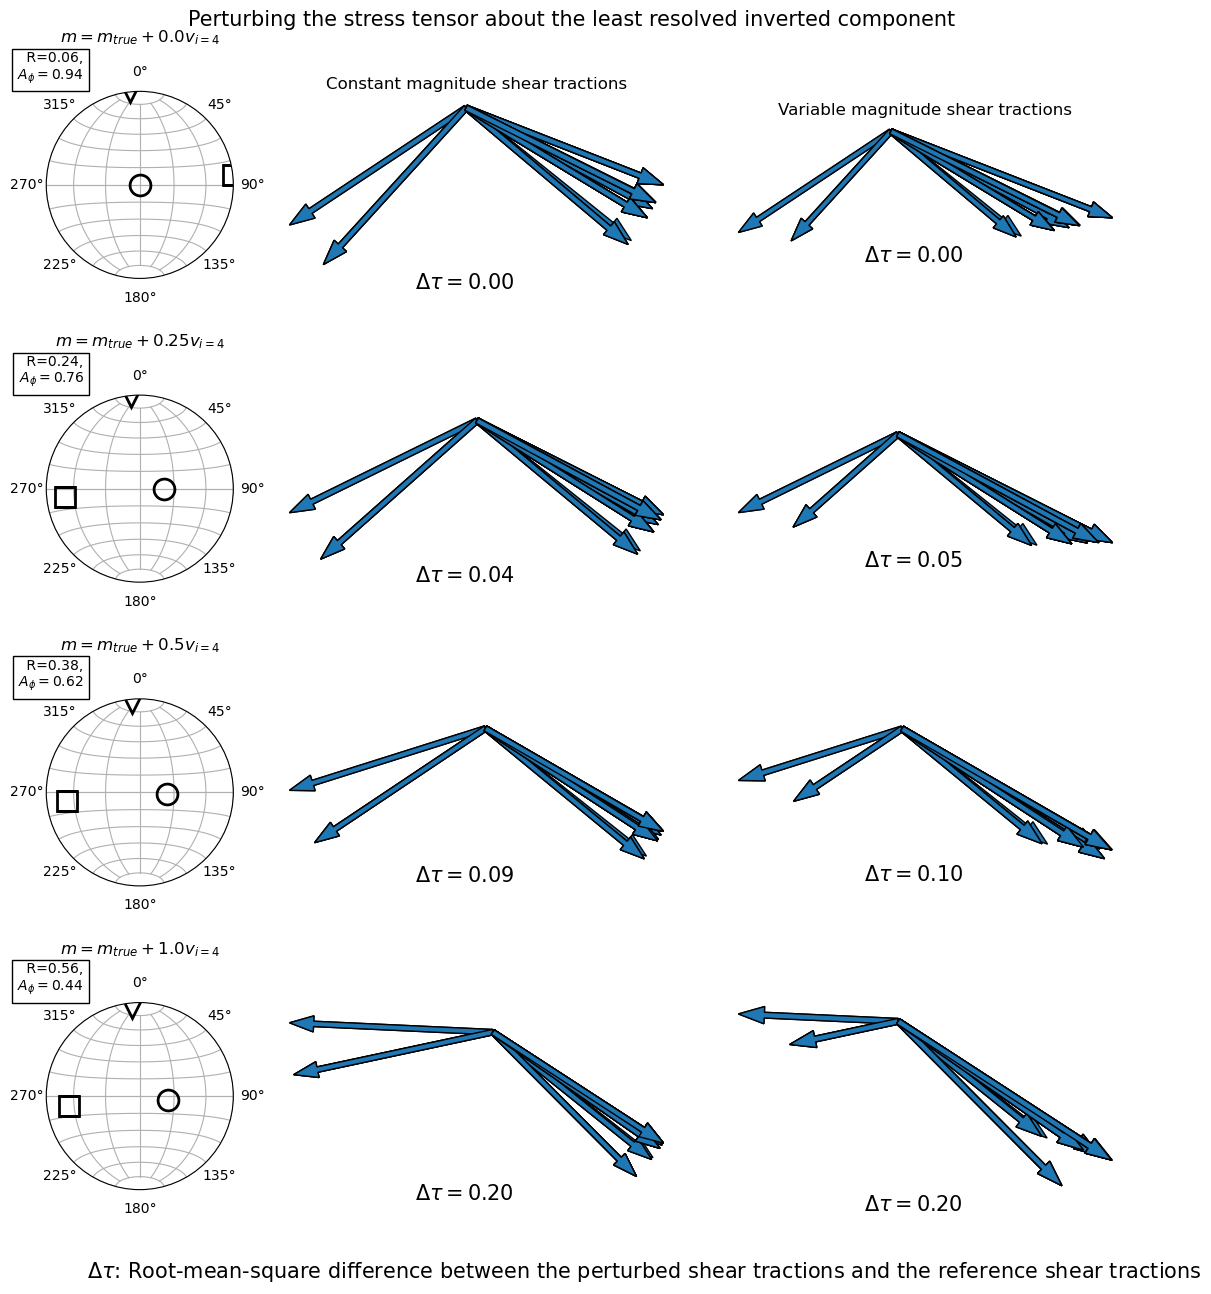

In [25]:
eigenvector_to_perturb = V_cov[:, -1]
figtitle = "Perturbing the stress tensor about the least resolved inverted component"
fig = plot_perturbed_stress_tensor(
    m_true, eigenvector_to_perturb, eigenvector_idx=4, figtitle=figtitle, figsize=(14, 13)
)

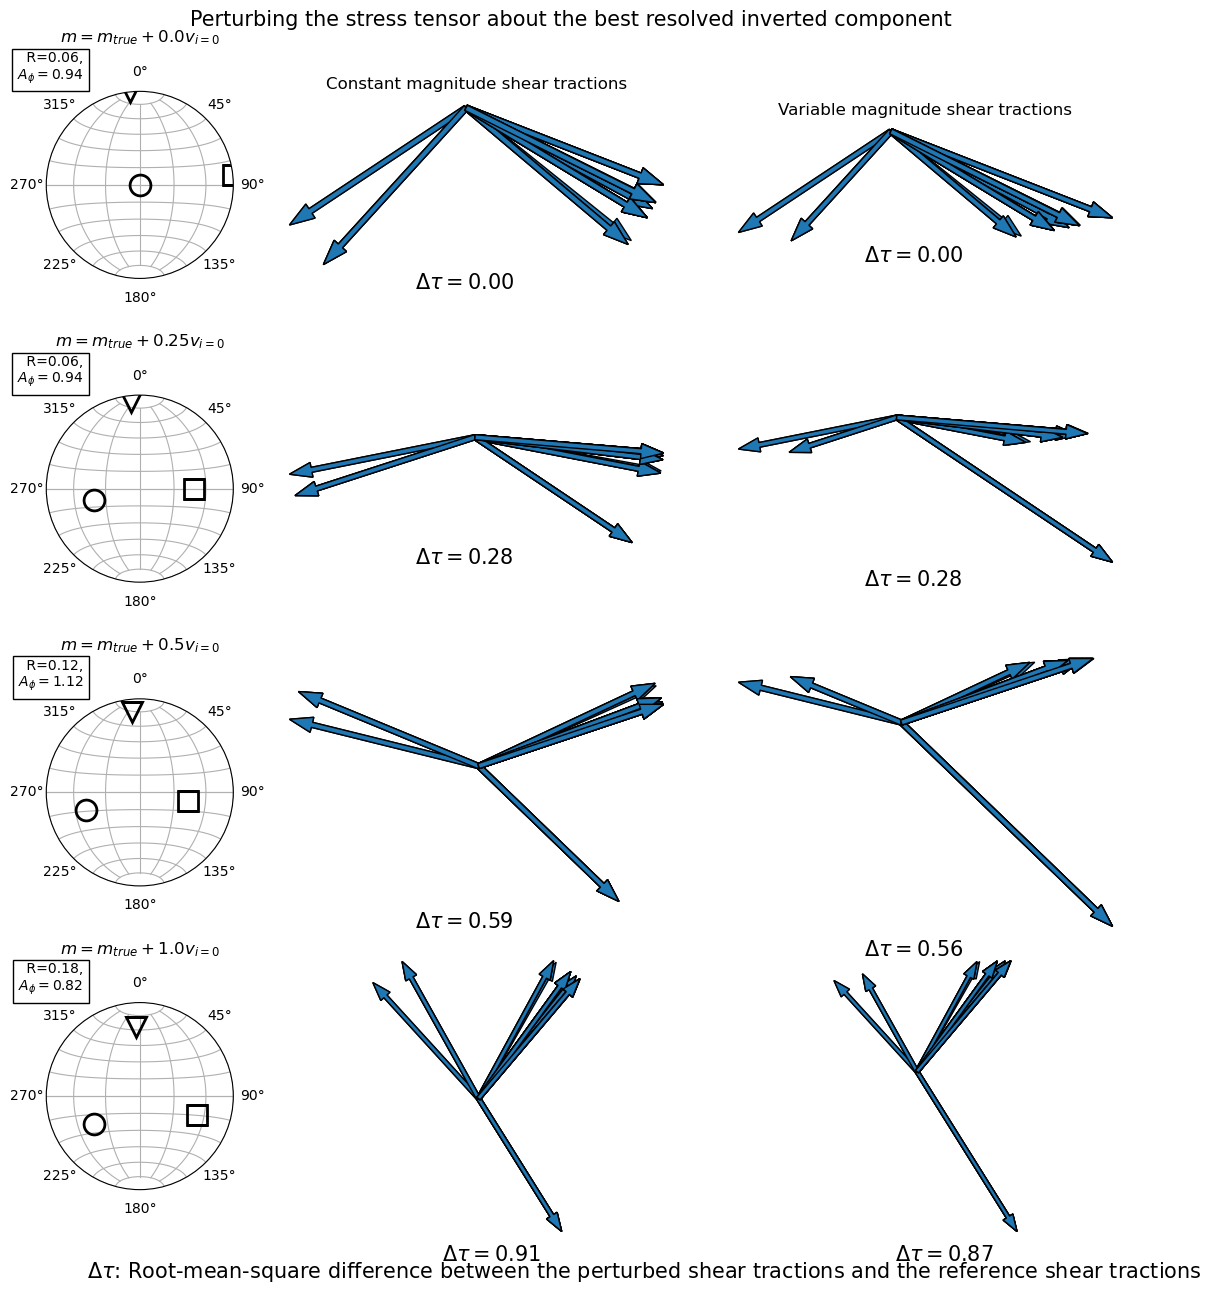

In [26]:
eigenvector_to_perturb = V_cov[:, 0]
figtitle = "Perturbing the stress tensor about the best resolved inverted component"
fig = plot_perturbed_stress_tensor(
    m_true, eigenvector_to_perturb, eigenvector_idx=0, figtitle=figtitle, figsize=(14, 13)
)

## Conclusions

All the analysis was done knowing the true fault planes and using noise-free focal mechanisms. Yet, the inversion shows significant uncertainties.

- We understood the larger uncertainties in $\sigma_{22}=\sigma_{WW}$, $\sigma_{23}=\sigma_{WU}$ and $\sigma_{11} = \sigma_{NN}$ as a geometrical problem.
- We showed graphically how the least resolved features could be used to generate perturbed stress tensors that look considerably different from the true stress tensor but still produce similar resolved shear stresses.

It essential to critically interpret the results of stress inversions. Here, we showed how to use the resolution operator and the posterior covariance operator of the Tarantola and Valette formalism to assess the quality of the inverted results. These operators are a good complement to boostrap uncertainties because the former typically fail at estimating meaningful confidence intervals when data diversity is low.

Finally, the analysis described here only investigate errors and limitations due to the geometry of the problem. It did not explore the additional errors caused by the inaccuracy of the forward problem and errors that araise when choosing auxiliary planes as the fault planes in the inversion.